In [2]:
# 加载示例数据
x = [4, 8, 12, 25, 32, 43, 58, 63, 69, 79]
y = [20, 33, 50, 56, 42, 31, 33, 46, 65, 75]

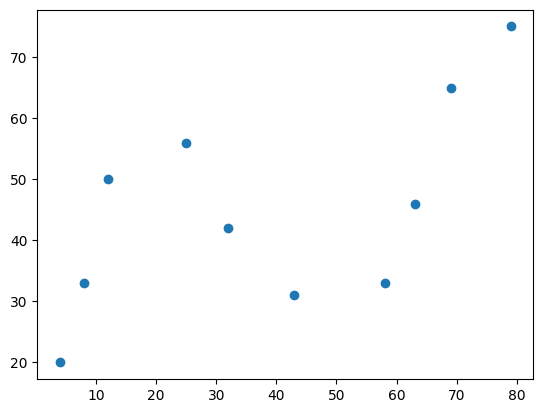

In [14]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.scatter(x, y)

In [19]:
# 基于数据要处理的是一元线性回归问题
def func(p, x):
    """一元二次函数表达式"""
    w0, w1, w2 = p
    y = w0 + w1 * x + w2 * x * x
    return y
    
# 残差函数（观测值与拟合值之间的差距）
def err_func(p,x,pred_y):
    return f(p,x) - pred_y

In [17]:
import numpy as np
from scipy.optimize import leastsq

# 线性最小二乘问题：有解析解，所以初始参数无影响
# 非线性最小二乘问题：通常没有解析解，需要迭代方法，迭代解

# 算法是迭代解，随机数取值影响不大，主要用来定义是几次多项式
# n 个值则最终求解出的是 n - 1 次多项式
p_init = np.random.randn(3)  # 生成 3 个随机数

# 使用 Scipy 提供的最小二乘法函数得到最佳拟合参数
parameters = leastsq(err_func, p_init, args=(np.array(x), np.array(y)))
print("Fitting Parameters: ", parameters[0])

Fitting Parameters:  [ 3.76893109e+01 -2.60474082e-01  8.00078003e-03]


(array([  0.        ,  14.28571429,  28.57142857,  42.85714286,
         57.14285714,  71.42857143,  85.71428571, 100.        ]),
 9)

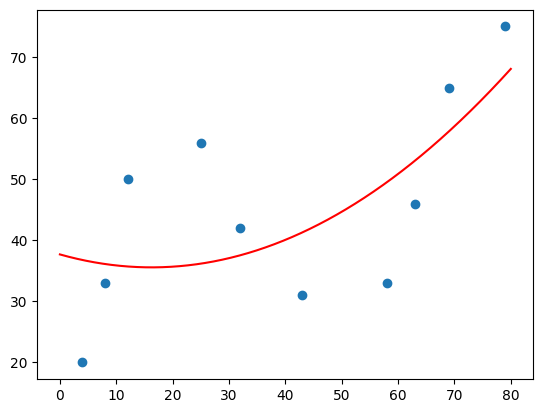

In [70]:

def draw(d,f):
    # 绘制拟合图像时需要的临时点
    x_temp = np.linspace(0, 80, 10000)
    
    # 绘制拟合函数曲线
    plt.plot(x_temp, d(f,x_temp), "r")
    
    # 绘制原数据点
    plt.scatter(x, y)

def d1(f,x_temp):
    return f(parameters[0], x_temp)

draw(d1,func)

In [45]:
# 由上可见，2次方程无法描述曲线变化

def fit_func(p, x):
    """根据公式，定义 n 次多项式函数"""
    f = np.poly1d(p)
    return f(x)


def err_func(p, x, y):
    """残差函数（观测值与拟合值之间的差距）"""
    ret = fit_func(p, x) - y
    return ret


def n_poly(n):
    """n 次多项式拟合"""
    p_init = np.random.randn(n)  # 生成 n 个随机数
    parameters = leastsq(err_func, p_init, args=(np.array(x), np.array(y)))
    return parameters[0]

def d_poly(f,x_temp):
    return fit_func(f, x_temp)

# draw(d_poly,n_poly(1))

Text(0.5, 1.0, 'm = 8')

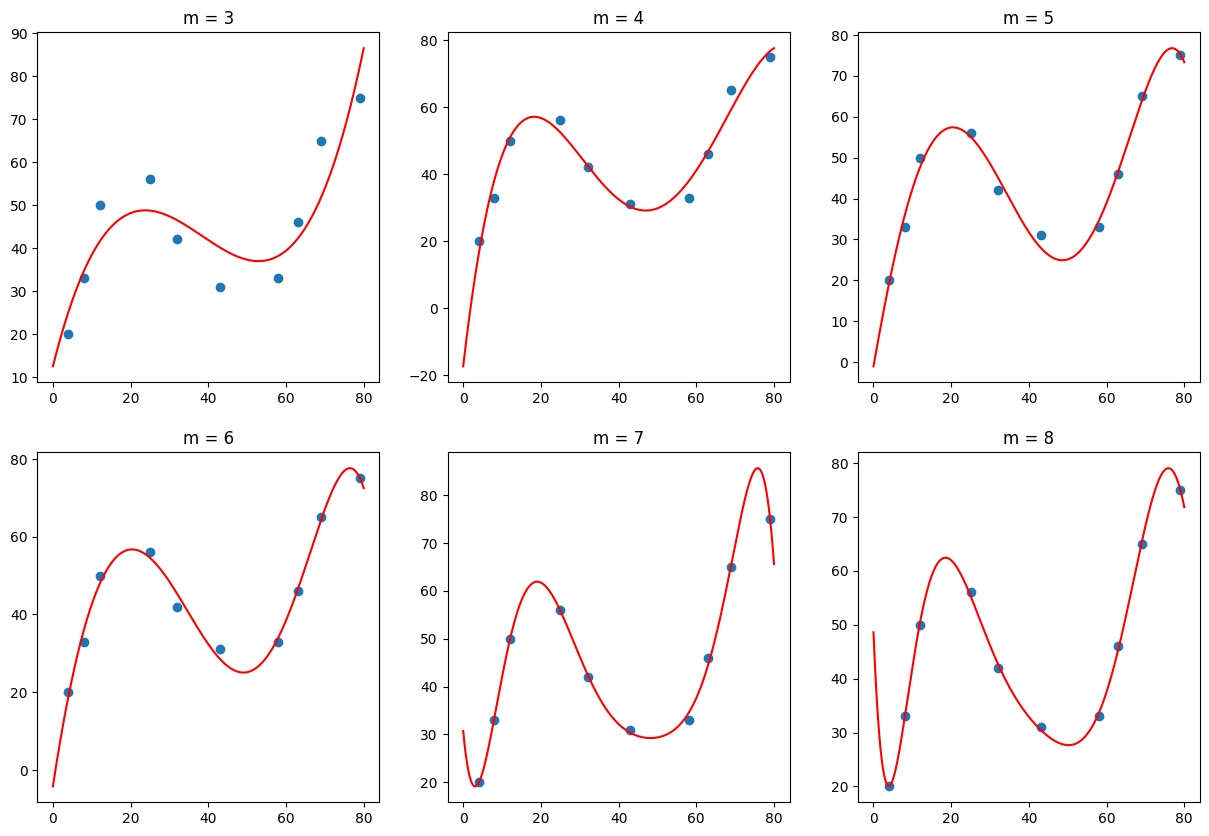

In [42]:
# 绘制子图
# 绘制2行3列，每个图大小
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# axes[x,y]: 取N行n列的位置画图
axes[0, 0].plot(x_temp, fit_func(n_poly(4), x_temp), "r")
axes[0, 0].scatter(x, y)
axes[0, 0].set_title("m = 3")

axes[0, 1].plot(x_temp, fit_func(n_poly(5), x_temp), "r")
axes[0, 1].scatter(x, y)
axes[0, 1].set_title("m = 4")

axes[0, 2].plot(x_temp, fit_func(n_poly(6), x_temp), "r")
axes[0, 2].scatter(x, y)
axes[0, 2].set_title("m = 5")

axes[1, 0].plot(x_temp, fit_func(n_poly(7), x_temp), "r")
axes[1, 0].scatter(x, y)
axes[1, 0].set_title("m = 6")

axes[1, 1].plot(x_temp, fit_func(n_poly(8), x_temp), "r")
axes[1, 1].scatter(x, y)
axes[1, 1].set_title("m = 7")

axes[1, 2].plot(x_temp, fit_func(n_poly(9), x_temp), "r")
axes[1, 2].scatter(x, y)
axes[1, 2].set_title("m = 8")

# m = 4开始拟合较好，随着m越大，出现过拟合（m = 8，出现震荡）

In [51]:
# 示例，怎么利用PolynomialFeatures计算出特征矩阵
from sklearn.preprocessing import PolynomialFeatures

#- degree: 多项式次数，默认为 2 次多项式
#- interaction_only: 默认为 False，如果为 True 则产生相互影响的特征集。
#- include_bias: 默认为 True，包含多项式中的截距项。

X = [2, -1, 3]
X_reshape = np.array(X).reshape(len(X), 1)  # 转换为列向量
# 使用 PolynomialFeatures 自动生成特征矩阵
PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_reshape)

array([[ 2.,  4.],
       [-1.,  1.],
       [ 3.,  9.]])

In [60]:
x = np.array(x).reshape(len(x), 1)  # 转换为列向量
y = np.array(y).reshape(len(y), 1)

# 使用 sklearn 得到 2 次多项式回归特征矩阵
poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_x = poly_features.fit_transform(x)

poly_x

array([[4.000e+00, 1.600e+01],
       [8.000e+00, 6.400e+01],
       [1.200e+01, 1.440e+02],
       [2.500e+01, 6.250e+02],
       [3.200e+01, 1.024e+03],
       [4.300e+01, 1.849e+03],
       [5.800e+01, 3.364e+03],
       [6.300e+01, 3.969e+03],
       [6.900e+01, 4.761e+03],
       [7.900e+01, 6.241e+03]])

In [53]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# 第一个参数：自变量 x 列矩阵，即特征矩阵
model.fit(poly_x,y)
model.intercept_, model.coef_

(array([37.68931083]), array([[-0.26047408,  0.00800078]]))

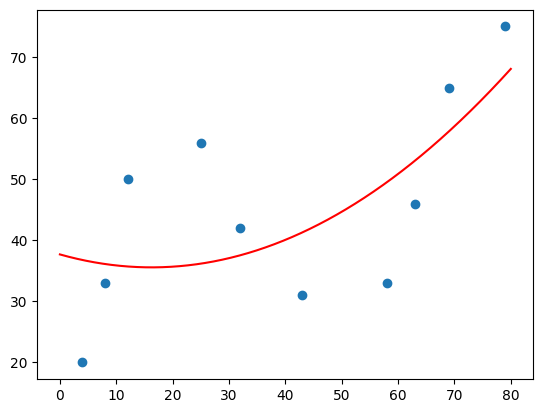

In [58]:
# 绘制拟合图像
x_temp = np.array(x_temp).reshape(len(x_temp), 1)
poly_x_temp = poly_features.fit_transform(x_temp)

# 进行预测，需要输入 x ，这里的 x 是 x 轴特征矩阵
plt.plot(x_temp, model.predict(poly_x_temp), "r")
plt.scatter(x, y)